> ## Recolección de datos

* #### Link: https://www.kaggle.com/datasets/bhanupratapbiswas/fashion-products

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/fashion-products/fashion_products.csv


> ## Análisis exploratorio

In [2]:
data = pd.read_csv("/kaggle/input/fashion-products/fashion_products.csv")

In [3]:
data.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [4]:
data.shape

(1000, 9)

In [5]:
data.isnull().sum()

User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.dtypes

User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object

In [8]:
data["Product ID"].nunique()

1000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


### Descripción del dataset.
* #### Contiene 1000 filas/observaciones y 9 columnas/variables.
* #### 5 variables son categóricas y 4 son numéricas.
* #### No tiene valores nulos ni duplicados.

* #### Redondear los datos de la variable "Rating" y eliminar columna "Product ID" ya que no aporta información al dataset.

In [10]:
data["Rating"] = round(data["Rating"])

In [11]:
data.drop(["Product ID"], axis=1, inplace=True)

In [12]:
data.head()

,User ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,Dress,Adidas,Men's Fashion,40,1.0,Black,XL
1,97,Shoes,H&M,Women's Fashion,82,4.0,Black,L
2,25,Dress,Adidas,Women's Fashion,44,3.0,Yellow,XL
3,57,Shoes,Zara,Men's Fashion,23,1.0,White,S
4,79,T-shirt,Adidas,Men's Fashion,79,4.0,Black,M


In [13]:
for var in data.columns:
    print(var)
    print(data[var].unique())
    print()

User ID
[ 19  97  25  57  79  98  16  63  96  36  69  87   9  50  31  37  41  15
  84  56  60  64  65  26  82  20  48  18  27  46  43  91  78  44  93  74
  51  80  39  33  24  99  83  38  54  53   6   3  94  42  71  72 100   4
  21  85  10   2  90  12  62  22  52  35  77  92  95   7  70  40  29  23
  34  73  58  88  75  67   5  13  59  61  81  55   8  32  30  76  49  68
  66  89  86  11   1  17  28  47  14  45]

Product Name
['Dress' 'Shoes' 'T-shirt' 'Jeans' 'Sweater']

Brand
['Adidas' 'H&M' 'Zara' 'Gucci' 'Nike']

Category
["Men's Fashion" "Women's Fashion" "Kids' Fashion"]

Price
[ 40  82  44  23  79  47  37  64  53  55  51  91  35  34  54  27  75  73
  56  89  15  38  21  72  32  85  99  78  80  74  48  76  90  26  43  39
  62  10  52  67  59  16  33  61  93  24  25  66  41  36  68  86  11  31
  49  42  50 100  70  58  30  84  95  19  13  60  71  12  96  65  81  28
  14  45  57  77  88  69  98  20  87  92  17  97  94  22  29  18  63  83
  46]

Rating
[1. 4. 3. 2. 5.]

Color
['Black

* #### Variables a analizar: Product Name, Brand, Category, Color y Size

			 ---------- Product Name ---------- 



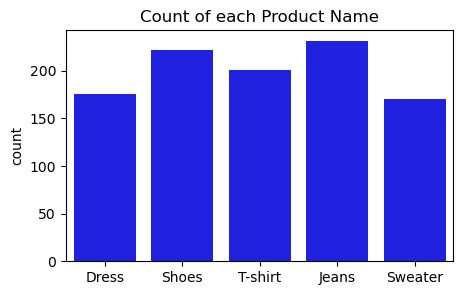

,Product Name
Jeans,231
Shoes,222
T-shirt,201
Dress,176
Sweater,170



			 ---------- Brand ---------- 



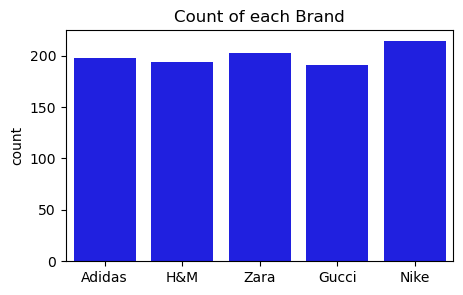

,Brand
Nike,214
Zara,203
Adidas,198
H&M,194
Gucci,191



			 ---------- Category ---------- 



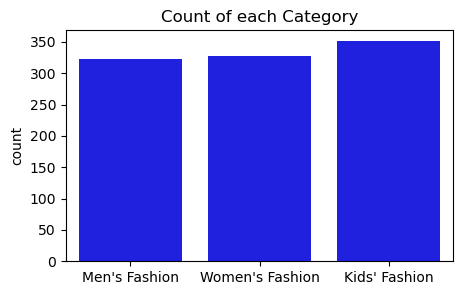

,Category
Kids' Fashion,351
Women's Fashion,327
Men's Fashion,322



			 ---------- Color ---------- 



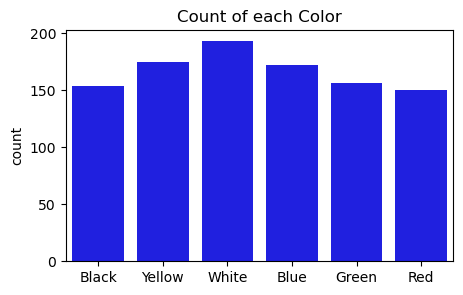

,Color
White,193
Yellow,175
Blue,172
Green,156
Black,154
Red,150



			 ---------- Size ---------- 



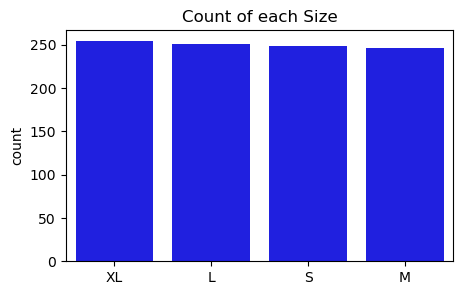

,Size
XL,254
L,251
S,249
M,246


In [14]:
variables = ["Product Name", "Brand", "Category", "Color", "Size"]
for var in variables:
    print("\t"*3,"-"*10,var,"-"*10,"\n")
    plt.figure(figsize=(5,3))
    sns.countplot(x=data[var], color="blue")
    plt.xlabel("")
    plt.title("Count of each "+var)
    plt.show()
    display(pd.DataFrame(data[var].value_counts()))
    print()

* #### Vamos a analizar las mismas variables pero con la variable "Rating" para conocer las valoraciones de cada categoría. 

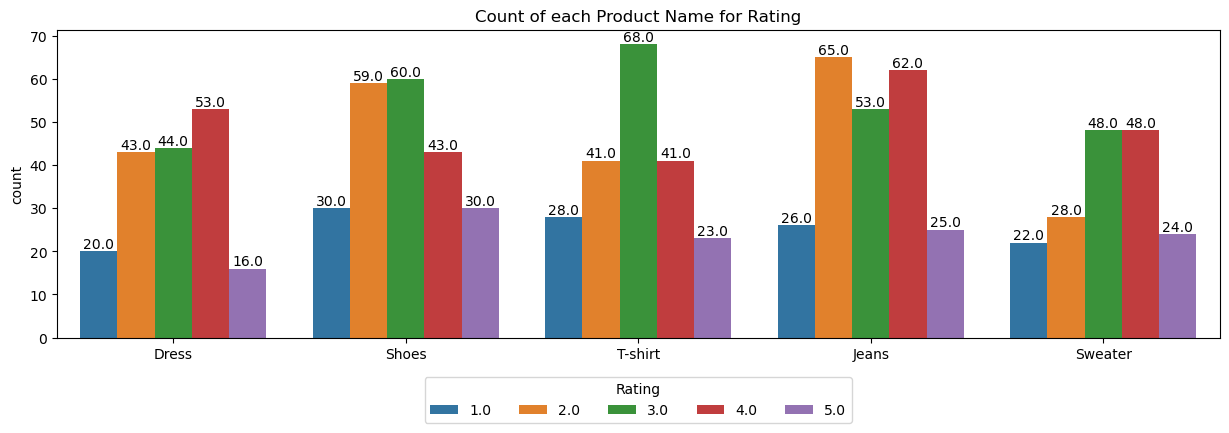

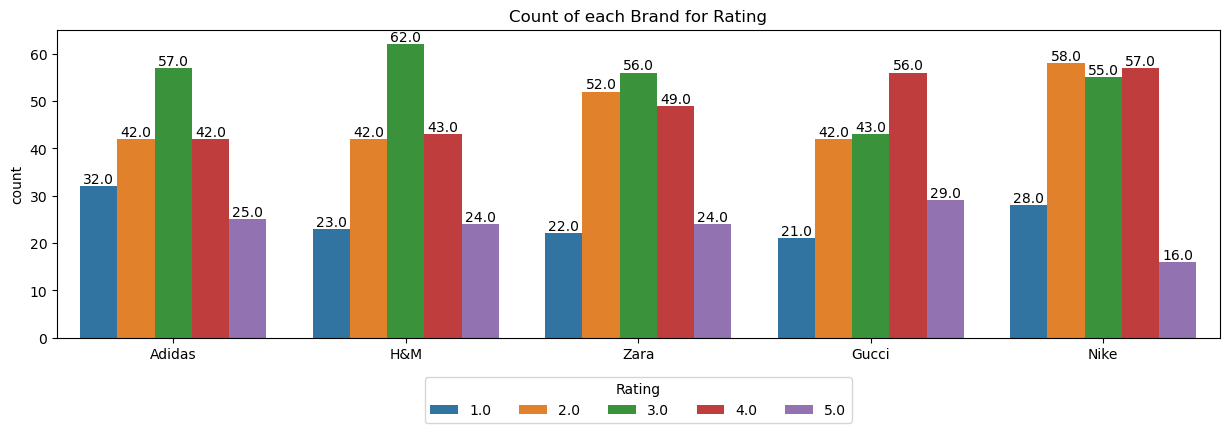

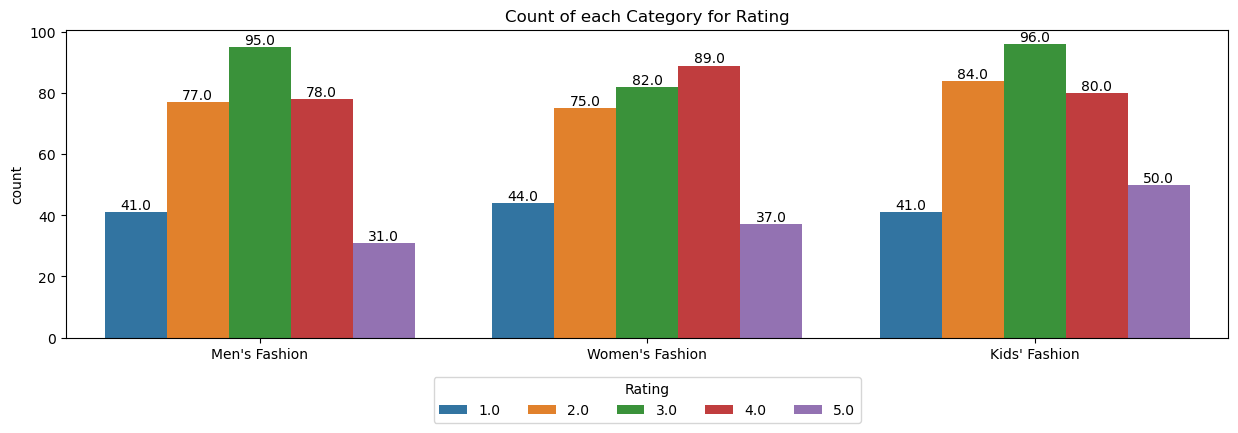

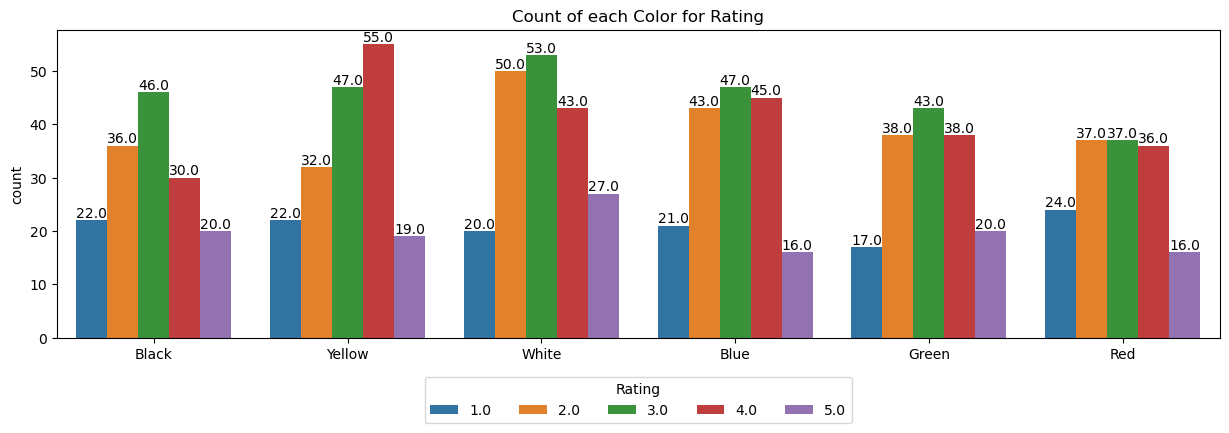

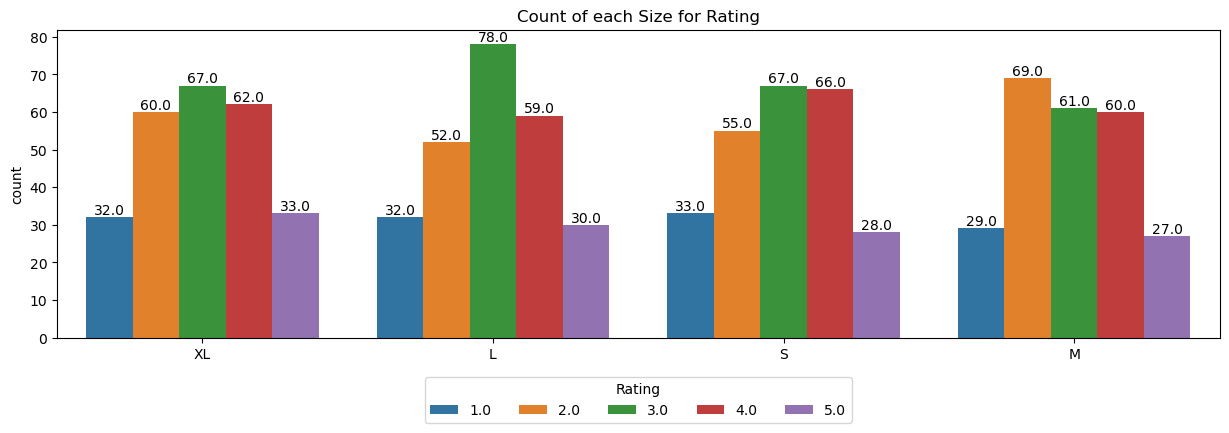

In [15]:
for var in variables:
    plt.figure(figsize=(15,4))
    ax = sns.countplot(data=data, x=var, hue='Rating')
    ax.set_xlabel('')
    legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.3), ncol=len(data['Rating'].unique()))
    legend.set_title("Rating")
    plt.title("Count of each "+var+" for Rating")
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
    plt.show()
    print("\n")


In [16]:
data.sort_values("User ID").head()

,User ID,Product Name,Brand,Category,Price,Rating,Color,Size
514,1,Dress,Nike,Kids' Fashion,64,4.0,White,S
843,1,Sweater,Zara,Kids' Fashion,11,3.0,Blue,M
878,1,T-shirt,Nike,Kids' Fashion,67,4.0,Red,S
336,1,Shoes,Nike,Women's Fashion,80,2.0,White,L
946,1,T-shirt,Zara,Kids' Fashion,48,3.0,White,S


> ## Sistema de recomendación
* #### Se le realizará al usuario indicado una recomendación por cada variable categórica ("Product Name","Brand","Category","Color" y "Size") que no haya validado antes .

* #### Matriz de valoraciones.

In [17]:
#Product Name, Brand, Category, Color, Size y Price
product_name_rating = round(data.pivot_table(index='User ID', columns='Product Name', values='Rating'))
brand_rating = round(data.pivot_table(index='User ID', columns='Brand', values='Rating'))
category_rating = round(data.pivot_table(index='User ID', columns='Category', values='Rating'))
color_rating = round(data.pivot_table(index='User ID', columns='Color', values='Rating'))
size_rating = round(data.pivot_table(index='User ID', columns='Size', values='Rating'))

In [18]:
product_name_rating.fillna(0,inplace=True)
brand_rating.fillna(0,inplace=True)
category_rating.fillna(0,inplace=True)
color_rating.fillna(0,inplace=True)
size_rating.fillna(0,inplace=True)

In [19]:
display(product_name_rating)
print()
display(brand_rating)
print()
display(category_rating)
print()
display(color_rating)
print()
display(size_rating)

Product Name,Dress,Jeans,Shoes,Sweater,T-shirt
User ID,,,,,
1,4.0,0.0,4.0,2.0,3.0
2,0.0,3.0,2.0,4.0,1.0
3,5.0,3.0,3.0,4.0,2.0
4,3.0,4.0,2.0,3.0,3.0
5,4.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...
96,4.0,2.0,5.0,4.0,0.0
97,0.0,0.0,3.0,4.0,2.0
98,2.0,3.0,3.0,0.0,3.0


Brand,Adidas,Gucci,H&M,Nike,Zara
User ID,,,,,
1,0.0,3.0,0.0,3.0,3.0
2,3.0,2.0,4.0,3.0,0.0
3,4.0,4.0,4.0,4.0,2.0
4,2.0,3.0,4.0,3.0,2.0
5,2.0,0.0,4.0,4.0,4.0
...,...,...,...,...,...
96,0.0,0.0,4.0,2.0,5.0
97,3.0,4.0,3.0,4.0,1.0
98,2.0,4.0,2.0,3.0,2.0


Category,Kids' Fashion,Men's Fashion,Women's Fashion
User ID,,,
1,4.0,3.0,3.0
2,2.0,4.0,2.0
3,3.0,4.0,3.0
4,4.0,3.0,2.0
5,3.0,4.0,4.0
...,...,...,...
96,3.0,4.0,4.0
97,2.0,3.0,3.0
98,3.0,2.0,3.0


Color,Black,Blue,Green,Red,White,Yellow
User ID,,,,,,
1,0.0,4.0,1.0,4.0,3.0,0.0
2,2.0,4.0,2.0,3.0,4.0,1.0
3,3.0,4.0,0.0,0.0,4.0,3.0
4,2.0,0.0,3.0,3.0,3.0,3.0
5,4.0,2.0,3.0,4.0,3.0,4.0
...,...,...,...,...,...,...
96,5.0,2.0,4.0,2.0,0.0,5.0
97,4.0,0.0,5.0,0.0,2.0,3.0
98,2.0,3.0,4.0,2.0,3.0,3.0


Size,L,M,S,XL
User ID,,,,
1,2.0,3.0,4.0,1.0
2,2.0,4.0,2.0,3.0
3,1.0,2.0,4.0,4.0
4,3.0,3.0,2.0,3.0
5,3.0,2.0,0.0,4.0
...,...,...,...,...
96,3.0,0.0,5.0,4.0
97,2.0,2.0,3.0,5.0
98,2.0,4.0,2.0,3.0


* #### División de datos en datos de entrenamiento y datos de prueba.

In [20]:
#Product Name, Brand, Category, Color, Price y Size
product_name_rating_train, product_name_rating_test = train_test_split(np.array(product_name_rating), 
                                                        test_size=0.3,
                                                        random_state=0)
product_name_rating_train_df, product_name_rating_test_df = train_test_split(product_name_rating, 
                                                        test_size=0.3,
                                                        random_state=0)

brand_rating_train, brand_rating_test = train_test_split(np.array(brand_rating), 
                                                        test_size=0.3,
                                                        random_state=0)
brand_rating_train_df, brand_rating_test_df = train_test_split(brand_rating, 
                                                        test_size=0.3,
                                                        random_state=0)

category_rating_train, category_rating_test = train_test_split(np.array(category_rating), 
                                                        test_size=0.3,
                                                        random_state=0)
category_rating_train_df, category_rating_test_df = train_test_split(category_rating, 
                                                        test_size=0.3,
                                                        random_state=0)

color_rating_train, color_rating_test = train_test_split(np.array(color_rating), 
                                                    test_size=0.3,
                                                    random_state=0)
color_rating_train_df, color_rating_test_df = train_test_split(color_rating, 
                                                    test_size=0.3,
                                                    random_state=0)

size_rating_train, size_rating_test = train_test_split(np.array(size_rating), 
                                                    test_size=0.3,
                                                    random_state=0)
size_rating_train_df, size_rating_test_df = train_test_split(size_rating, 
                                                    test_size=0.3,
                                                    random_state=0)

* #### Filtro colaborativo basado en usuarios con K Nearest Neighbors.

In [21]:
neighbors_product_name_rating = neighbors.NearestNeighbors(n_neighbors=5,
                                metric="cosine")

neighbors_brand_rating = neighbors.NearestNeighbors(n_neighbors=5,
                                metric="cosine")

neighbors_category_rating = neighbors.NearestNeighbors(n_neighbors=5,
                                metric="cosine")

neighbors_color_rating = neighbors.NearestNeighbors(n_neighbors=5,
                                metric="cosine")

neighbors_size_rating = neighbors.NearestNeighbors(n_neighbors=5,
                                metric="cosine")

In [22]:
neighbors_product_name_rating.fit(product_name_rating_train)

neighbors_brand_rating.fit(brand_rating_train)

neighbors_category_rating.fit(category_rating_train)

neighbors_color_rating.fit(color_rating_train)

neighbors_size_rating.fit(size_rating_train)

NearestNeighbors(metric='cosine')

In [23]:
def get_mse(preds,actuals):
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds,actuals)

* ### Predecir los valores con los conjuntos de prueba.

In [24]:
neighbor_product_name_distance, neighbor_product_name_user = neighbors_product_name_rating.kneighbors(product_name_rating_train,
                                                                                                    return_distance=True)

neighbor_brand_distance, neighbor_brand_user = neighbors_brand_rating.kneighbors(brand_rating_train,
                                                                                return_distance=True)

neighbor_category_distance, neighbor_category_user = neighbors_category_rating.kneighbors(category_rating_train,
                                                                                        return_distance=True)

neighbor_color_distance, neighbor_color_user = neighbors_color_rating.kneighbors(color_rating_train,
                                                                                return_distance=True)

neighbor_size_distance, neighbor_size_user = neighbors_size_rating.kneighbors(size_rating_train,
                                                                            return_distance=True)

neighbor_product_name_similarity = 1 - neighbor_product_name_distance

neighbor_brand_similarity = 1 - neighbor_brand_distance

neighbor_category_similarity = 1 - neighbor_category_distance

neighbor_color_similarity = 1 - neighbor_color_distance

neighbor_size_similarity = 1 - neighbor_size_distance

users_predicts_product_name = np.zeros(product_name_rating_train.shape)
users_predicts_brand = np.zeros(brand_rating_train.shape)
users_predicts_category = np.zeros(category_rating_train.shape)
users_predicts_color = np.zeros(color_rating_train.shape)
users_predicts_size = np.zeros(size_rating_train.shape)

for i in range(product_name_rating_train.shape[0]):
    users_predicts_product_name[i,:] = (
                        neighbor_product_name_similarity[i].T.dot(product_name_rating_train[neighbor_product_name_user][i])
                        /
                        np.array([np.abs(neighbor_product_name_similarity[i].T).sum(axis=0)]).T
                        )
    
    users_predicts_brand[i,:] = (
                        neighbor_brand_similarity[i].T.dot(brand_rating_train[neighbor_brand_user][i])
                        /
                        np.array([np.abs(neighbor_brand_similarity[i].T).sum(axis=0)]).T
                        )
    
    users_predicts_category[i,:] = (
                        neighbor_category_similarity[i].T.dot(category_rating_train[neighbor_category_user][i])
                        /
                        np.array([np.abs(neighbor_category_similarity[i].T).sum(axis=0)]).T
                        )
    
    users_predicts_color[i,:] = (
                        neighbor_color_similarity[i].T.dot(color_rating_train[neighbor_color_user][i])
                        /
                        np.array([np.abs(neighbor_color_similarity[i].T).sum(axis=0)]).T
                        )
    
    users_predicts_size[i,:] = (
                        neighbor_size_similarity[i].T.dot(size_rating_train[neighbor_size_user][i])
                        /
                        np.array([np.abs(neighbor_size_similarity[i].T).sum(axis=0)]).T
                        )
    
print(get_mse(users_predicts_product_name,product_name_rating_train))
print(get_mse(users_predicts_brand,brand_rating_train))
print(get_mse(users_predicts_category,category_rating_train))
print(get_mse(users_predicts_color,color_rating_train))
print(get_mse(users_predicts_size,size_rating_train))

0.2672867067422191
0.2595549126120603
0.17890890846425864
0.2805203070938386
0.24489085052379633


* ### Predecir los valores con los conjuntos de test.

In [25]:
neighbor_product_name_distance, neighbor_product_name_user = neighbors_product_name_rating.kneighbors(product_name_rating_test,
                                                                                                    return_distance=True)

neighbor_brand_distance, neighbor_brand_user = neighbors_brand_rating.kneighbors(brand_rating_test,
                                                                                return_distance=True)

neighbor_category_distance, neighbor_category_user = neighbors_category_rating.kneighbors(category_rating_test,
                                                                                        return_distance=True)

neighbor_color_distance, neighbor_color_user = neighbors_color_rating.kneighbors(color_rating_test,
                                                                                return_distance=True)

neighbor_size_distance, neighbor_size_user = neighbors_size_rating.kneighbors(size_rating_test,
                                                                            return_distance=True)

neighbor_product_name_similarity = 1 - neighbor_product_name_distance

neighbor_brand_similarity = 1 - neighbor_brand_distance

neighbor_category_similarity = 1 - neighbor_category_distance

neighbor_color_similarity = 1 - neighbor_color_distance

neighbor_size_similarity = 1 - neighbor_size_distance

users_predicts_product_name = np.zeros(product_name_rating_test.shape)
users_predicts_brand = np.zeros(brand_rating_test.shape)
users_predicts_category = np.zeros(category_rating_test.shape)
users_predicts_color = np.zeros(color_rating_test.shape)
users_predicts_size = np.zeros(size_rating_test.shape)

for i in range(product_name_rating_test.shape[0]):
    users_predicts_product_name[i,:] = (
                        neighbor_product_name_similarity[i].T.dot(product_name_rating_train[neighbor_product_name_user][i])
                        /
                        np.array([np.abs(neighbor_product_name_similarity[i].T).sum(axis=0)]).T
                        )
    
    users_predicts_brand[i,:] = (
                        neighbor_brand_similarity[i].T.dot(brand_rating_train[neighbor_brand_user][i])
                        /
                        np.array([np.abs(neighbor_brand_similarity[i].T).sum(axis=0)]).T
                        )
    
    users_predicts_category[i,:] = (
                        neighbor_category_similarity[i].T.dot(category_rating_train[neighbor_category_user][i])
                        /
                        np.array([np.abs(neighbor_category_similarity[i].T).sum(axis=0)]).T
                        )
    
    users_predicts_color[i,:] = (
                        neighbor_color_similarity[i].T.dot(color_rating_train[neighbor_color_user][i])
                        /
                        np.array([np.abs(neighbor_color_similarity[i].T).sum(axis=0)]).T
                        )
    
    users_predicts_size[i,:] = (
                        neighbor_size_similarity[i].T.dot(size_rating_train[neighbor_size_user][i])
                        /
                        np.array([np.abs(neighbor_size_similarity[i].T).sum(axis=0)]).T
                        )
    
print(get_mse(users_predicts_product_name,product_name_rating_test))
print(get_mse(users_predicts_brand,brand_rating_test))
print(get_mse(users_predicts_category,category_rating_test))
print(get_mse(users_predicts_color,color_rating_test))
print(get_mse(users_predicts_size,size_rating_test))

0.5275348701108945
0.4262770741704682
0.2187587971465965
0.5427925529235494
0.2815732258700233


* #### Recomendación de producto.

In [26]:
def recommendation_product(user_id):
    product_name_to_recommend = list(set(data["Product Name"].unique())-set(data[data["User ID"]==user_id]["Product Name"].unique()))
    if product_name_to_recommend:
        _,neighbor_product_name_user = neighbors_product_name_rating.kneighbors(np.array(product_name_rating.loc[user_id,:]).reshape(1,-1),
                                                                           return_distance=True)


        groupby_product = pd.DataFrame(data[(data["User ID"]==neighbor_product_name_user[0][0]+1)|
                                            (data["User ID"]==neighbor_product_name_user[0][1]+1)|
                                            (data["User ID"]==neighbor_product_name_user[0][2]+1)|
                                            (data["User ID"]==neighbor_product_name_user[0][3]+1)
                                           ].groupby(["User ID", "Product Name"]).value_counts())
        recommender_product = []

        for i in range(len(groupby_product.index)):
            if groupby_product.index[i][1]==product_name_to_recommend[0]:
                recommender_product.append(groupby_product.index[i])        

        recommender_product = sorted(recommender_product, key=lambda x: x[5], reverse=True)[0]
        return recommender_product
    else:
        return

* #### Recomendación de marca.

In [27]:
def recommendation_brand(user_id):
    brand_to_recommend = list(set(data["Brand"].unique())-set(data[data["User ID"]==user_id]["Brand"].unique()))
    if brand_to_recommend:
        _,neighbor_brand_user = neighbors_brand_rating.kneighbors(np.array(brand_rating.loc[user_id,:]).reshape(1,-1),
                                                                           return_distance=True)


        groupby_brand = pd.DataFrame(data[(data["User ID"]==neighbor_brand_user[0][0]+1)|
                                            (data["User ID"]==neighbor_brand_user[0][1]+1)|
                                            (data["User ID"]==neighbor_brand_user[0][2]+1)|
                                            (data["User ID"]==neighbor_brand_user[0][3]+1)
                                           ].groupby(["User ID", "Brand"]).value_counts())
        recommender_brand = []

        for i in range(len(groupby_brand.index)):
            if groupby_brand.index[i][1]==brand_to_recommend[0]:
                recommender_brand.append(groupby_brand.index[i])        

        recommender_brand = sorted(recommender_brand, key=lambda x: x[5], reverse=True)[0]
        return recommender_brand
    else:
        return

* #### Recomendación de categoría.

In [28]:
def recommendation_category(user_id):
    category_to_recommend = list(set(data["Category"].unique())-set(data[data["User ID"]==user_id]["Category"].unique()))
    if category_to_recommend:
        _,neighbor_category_user = neighbors_category_rating.kneighbors(np.array(category_rating.loc[user_id,:]).reshape(1,-1),
                                                                           return_distance=True)


        groupby_category = pd.DataFrame(data[(data["User ID"]==neighbor_category_user[0][0]+1)|
                                            (data["User ID"]==neighbor_category_user[0][1]+1)|
                                            (data["User ID"]==neighbor_category_user[0][2]+1)|
                                            (data["User ID"]==neighbor_category_user[0][3]+1)
                                           ].groupby(["User ID", "Category"]).value_counts())
        recommender_category = []

        for i in range(len(groupby_category.index)):
            if groupby_category.index[i][1]==category_to_recommend[0]:
                recommender_category.append(groupby_category.index[i])        

        recommender_category = sorted(recommender_category, key=lambda x: x[5], reverse=True)[0]
        return recommender_category
    else:
        return

* #### Recomendación de color.

In [29]:
def recommendation_color(user_id):
    color_to_recommend = list(set(data["Color"].unique())-set(data[data["User ID"]==user_id]["Color"].unique()))
    if color_to_recommend:
        _,neighbor_color_user = neighbors_color_rating.kneighbors(np.array(color_rating.loc[user_id,:]).reshape(1,-1),
                                                                           return_distance=True)


        groupby_color = pd.DataFrame(data[(data["User ID"]==neighbor_color_user[0][0]+1)|
                                            (data["User ID"]==neighbor_color_user[0][1]+1)|
                                            (data["User ID"]==neighbor_color_user[0][2]+1)|
                                            (data["User ID"]==neighbor_color_user[0][3]+1)
                                           ].groupby(["User ID", "Color"]).value_counts())
        recommender_color = []

        for i in range(len(groupby_color.index)):
            if groupby_color.index[i][1]==color_to_recommend[0]:
                recommender_color.append(groupby_color.index[i])        

        recommender_color = sorted(recommender_color, key=lambda x: x[5], reverse=True)[0]
        return recommender_color
    else:
        return

* #### Recomendación de tamaño.

In [30]:
def recommendation_size(user_id):
    size_to_recommend = list(set(data["Size"].unique())-set(data[data["User ID"]==user_id]["Size"].unique()))
    if size_to_recommend:
        _,neighbor_size_user = neighbors_size_rating.kneighbors(np.array(size_rating.loc[user_id,:]).reshape(1,-1),
                                                                           return_distance=True)


        groupby_size = pd.DataFrame(data[(data["User ID"]==neighbor_size_user[0][0]+1)|
                                            (data["User ID"]==neighbor_size_user[0][1]+1)|
                                            (data["User ID"]==neighbor_size_user[0][2]+1)|
                                            (data["User ID"]==neighbor_size_user[0][3]+1)
                                           ].groupby(["User ID", "Size"]).value_counts())
        recommender_size = []

        for i in range(len(groupby_size.index)):
            if groupby_size.index[i][1]==size_to_recommend[0]:
                recommender_size.append(groupby_size.index[i])        

        recommender_size = sorted(recommender_size, key=lambda x: x[5], reverse=True)[0]
        return recommender_size
    else:
        return 

* #### Recomendaciones.

In [31]:
def recommendation_system(user_id):
    return [recommendation_product(user_id),
            recommendation_brand(user_id),
            recommendation_category(user_id),
            recommendation_color(user_id),
            recommendation_size(user_id)]

In [39]:
user_id = 67
recommendations = recommendation_system(user_id)
recommendations = list(filter(None, recommendations))
print("Recomendaciones para el usuario",user_id,":")
print()
display(recommendations)

Recomendaciones para el usuario 67 :



[(61, 'Dress', 'Zara', "Kids' Fashion", 33, 5.0, 'Blue', 'M'),
 (29, 'Gucci', 'T-shirt', "Women's Fashion", 91, 5.0, 'Yellow', 'XL'),
 (37, 'Blue', 'Dress', 'H&M', "Men's Fashion", 93, 4.0, 'M')]